# 302 在线性回归模型中使用梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
np.random.seed(666)
x = np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size = 100)

In [3]:
X = x.reshape(-1, 1)

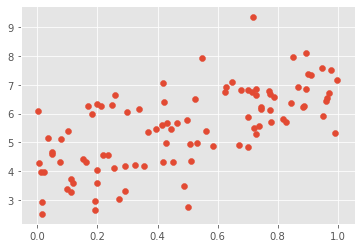

In [4]:
plt.scatter(X, y)

### 使用梯度下降法训练

In [5]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [6]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

In [7]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        cur_iter += 1

    return theta

In [8]:
X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1,1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [9]:
theta

array([4.0269033, 3.0043078])

### 封装我们的线性回归算法

In [10]:
import sys
sys.path.insert(0,'./code')
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [11]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[3.0043078]
4.0269033037832385


## 梯度下降的向量化
$$\nabla J(\theta)=\frac{2}{m}\cdot X_b^T \cdot (X_b \theta-y)$$

In [12]:
import numpy as np
from sklearn import datasets

In [13]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y<50.0]
y = y[y<50.0]

In [14]:
import sys
sys.path.insert(0,'./code')
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [17]:
from playML.LinearRegression import LinearRegression

lin_reg1 = LinearRegression()
%time lin_reg1.fit_normal(X_train, y_train)
lin_reg1.score(X_test, y_test)

Wall time: 1.03 ms


0.8129794056212823

In [18]:
lin_reg2 = LinearRegression()
lin_reg2.fit_gd(X_train, y_train)

E:\software\Anaconda\Anaconda\envs\Kaggle\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
./code\playML\LinearRegression.py:32: RuntimeWarning: overflow encountered in square
  return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
./code\playML\LinearRegression.py:55: RuntimeWarning: invalid value encountered in double_scalars
  if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):


LinearRegression()

In [19]:
lin_reg2.coef_

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [20]:
lin_reg2.fit_gd(X_train, y_train, eta=0.000001)

LinearRegression()

In [21]:
lin_reg2.score(X_test, y_test)

0.27586818724477236

In [22]:
%time lin_reg2.fit_gd(X_train, y_train, eta=0.000001, n_iters=1e6)

Wall time: 41.8 s


LinearRegression()

In [23]:
lin_reg2.score(X_test, y_test)

0.7542932581943915

### 使用梯度下降法前进行数据归一化

In [24]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)

lin_reg3 = LinearRegression()
%time lin_reg3.fit_gd(X_train_standard, y_train)

Wall time: 177 ms


LinearRegression()

In [25]:
X_test_standard = standardScaler.transform(X_test)
lin_reg3.score(X_test_standard, y_test)

0.8129873310487505

### 梯度下降法的优势

In [26]:
m = 1000
n = 5000

big_X = np.random.normal(size=(m, n))

true_theta = np.random.uniform(0.0, 100.0, size=n+1)

big_y = big_X.dot(true_theta[1:]) + true_theta[0] + np.random.normal(0., 10., size=m)

In [27]:
big_reg1 = LinearRegression()
%time big_reg1.fit_normal(big_X, big_y)

Wall time: 4.38 s


LinearRegression()

In [28]:
big_reg2 = LinearRegression()
%time big_reg2.fit_gd(big_X, big_y)

Wall time: 3.93 s


LinearRegression()